In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## Load original word embeddings

In [1]:
## load original word embeddings
#import gensim
#import json
#import csv
#import pickle as pickle
#from sklearn.decomposition import PCA
#import subprocess

# Load Google's pre-trained Word2Vec model
#model = gensim.models.KeyedVectors.load_word2vec_format(
#    'D:/word2vec/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
# How to access word vectors
# dog = model['dog']
# print dog.shape
# print dog[:10]

In [ ]:
'''
second =   model['second']
third =    model['third']
fourth =   model['fourth']
fifth =    model['fifth']
sixth =    model['sixth']
seventh =  model['seventh']
blue =     model['blue']
green =    model['green']
red =      model['red']
ball =     model['ball']

embeddings = pd.DataFrame([['second', second],['third', third],['fourth', fourth],
                           ['fifth', fifth],['sixth', sixth],['seventh', seventh],
                           ['blue', blue],['green', green],['red', red],
                           ['ball', ball]],
                           columns = ['word', 'embedding'])
embeddings.to_csv('word2vec/embeddings.csv', index=False)
'''

In [ ]:
'''
#reduce dimensionality of vectors using PCA (using loaded vectors)
X_train_names = []
X_train = []

listofwords = [second, third, fourth, fifth, sixth, seventh, blue, green, red, ball]
listofnames = ['second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'blue', 'green', 'red', 'ball']

run = 0
for word in listofwords:
        X_train.append(word)
        X_train_names.append(listofnames[run])
        run = run + 1

X_train = np.asarray(X_train)

X = X_train
X = X - X.mean(axis=0) 
cov_X =  np.cov(np.transpose(X))
values, vectors = np.linalg.eig(cov_X)
projection = np.transpose(np.transpose(vectors).dot(np.transpose(X)))
reduced_projection = projection[:,np.std(projection,axis=0) > 0.00000000000000029] #10 dim
#reduced_projection = projection[:,np.std(projection,axis=0) > 0.01]
reduced_projection = np.real(reduced_projection)

second = reduced_projection[0]
third = reduced_projection[1]
fourth = reduced_projection[2]
fifth = reduced_projection[3]
sixth = reduced_projection[4]
seventh = reduced_projection[5]
blue = reduced_projection[6]
green = reduced_projection[7]
red = reduced_projection[8]
ball = reduced_projection[9]

reduced_embeddings = pd.DataFrame([['second', second],['third', third],['fourth', fourth],
                                   ['fifth', fifth],['sixth', sixth],['seventh', seventh],
                                  ['blue', blue],['green', green],['red', red],
                                  ['ball', ball]],
                                  columns = ['word', 'embedding'])
#reduced_embeddings.to_csv('word2vec/reduced_embeddings.csv', index=False)
#reduced_projection[0].shape
'''
'''
reduced_embeddings = reduced_embeddings['embedding']
second_red = np.array(np.matrix(reduced_embeddings[0])).ravel()
third_red = np.array(np.matrix(reduced_embeddings[1])).ravel()
fourth_red = np.array(np.matrix(reduced_embeddings[2])).ravel()
fifth_red = np.array(np.matrix(reduced_embeddings[3])).ravel()
sixth_red = np.array(np.matrix(reduced_embeddings[4])).ravel()
seventh_red = np.array(np.matrix(reduced_embeddings[5])).ravel()
blue_red = np.array(np.matrix(reduced_embeddings[6])).ravel()
green_red = np.array(np.matrix(reduced_embeddings[7])).ravel()
red_red = np.array(np.matrix(reduced_embeddings[8])).ravel()
ball_red = np.array(np.matrix(reduced_embeddings[9])).ravel()
'''

## Load full and reduced word embeddings

In [2]:
# load dimensionality-reduced embeddings
red_embeddings = pd.read_csv('word2vec/reduced_embeddings.csv', header = 0)
red_embeddings = red_embeddings['embedding']
# convert the embeddings from list to string of floats
second_red = np.array(np.matrix(red_embeddings[0])).ravel()
third_red = np.array(np.matrix(red_embeddings[1])).ravel()
fourth_red = np.array(np.matrix(red_embeddings[2])).ravel()
fifth_red = np.array(np.matrix(red_embeddings[3])).ravel()
sixth_red = np.array(np.matrix(red_embeddings[4])).ravel()
seventh_red = np.array(np.matrix(red_embeddings[5])).ravel()
blue_red = np.array(np.matrix(red_embeddings[6])).ravel()
green_red = np.array(np.matrix(red_embeddings[7])).ravel()
red_red = np.array(np.matrix(red_embeddings[8])).ravel()
ball_red = np.array(np.matrix(red_embeddings[9])).ravel()

In [4]:
embeddings = pd.read_csv('word2vec/embeddings.csv', header = 0)
embeddings = embeddings['embedding']
# convert the embeddings from list to string of floats
second = np.array(np.matrix(embeddings[0])).ravel()
third = np.array(np.matrix(embeddings[1])).ravel()
fourth = np.array(np.matrix(embeddings[2])).ravel()
fifth = np.array(np.matrix(embeddings[3])).ravel()
sixth = np.array(np.matrix(embeddings[4])).ravel()
seventh = np.array(np.matrix(embeddings[5])).ravel()
blue = np.array(np.matrix(embeddings[6])).ravel()
green = np.array(np.matrix(embeddings[7])).ravel()
red = np.array(np.matrix(embeddings[8])).ravel()
ball = np.array(np.matrix(embeddings[9])).ravel()

## Plot similarity matrices

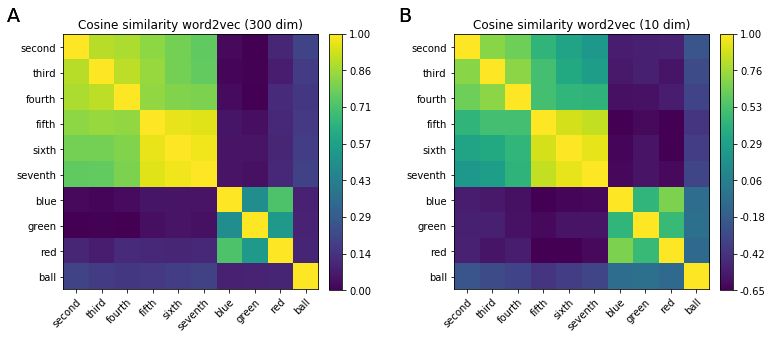

In [5]:
words_red = [second_red, third_red, fourth_red, fifth_red, sixth_red, seventh_red, blue_red, green_red, red_red, ball_red]
words = [second, third, fourth, fifth, sixth, seventh, blue, green, red, ball]
axis = ['second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'blue', 'green', 'red', 'ball']
corr_matrix_red = cosine_similarity(words_red)#np.corrcoef(words_red)
corr_matrix = cosine_similarity(words)#np.corrcoef(words)

cos_matrices = [corr_matrix, corr_matrix_red]

fig, ax = plt.subplots(1,2, figsize=(12,12))

for subs in range(len(ax)):
    im = ax[subs].imshow(cos_matrices[subs], cmap='viridis', interpolation='nearest')

    ax[subs].set_xticks(np.arange(len(axis)))
    ax[subs].set_yticks(np.arange(len(axis)))
    ax[subs].set_xticklabels(axis)
    ax[subs].set_yticklabels(axis)
    ax[0].set_title('Cosine similarity word2vec (300 dim)')
    ax[1].set_title('Cosine similarity word2vec (10 dim)')
    plt.setp(ax[subs].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    v1 = np.linspace(cos_matrices[subs].min(), cos_matrices[subs].max(), 8, endpoint=True)
    cb = plt.colorbar(im, ax = ax[subs], ticks = v1, fraction=0.046, pad=0.04)#ticks =[-0.6, 0.1, 1], 
    cb.ax.set_yticklabels(["{:4.2f}".format(i) for i in v1])
    ax[0].text(-2.7, -1, 'A', fontsize=19)
    ax[1].text(-2.7, -1, 'B', fontsize=19)
    
plt.plot()
plt.subplots_adjust(wspace = 0.4 )
#os. getcwd()
#plt.savefig('Fig9.jpg', dpi = 150, bbox_inches='tight' )
